In [1]:
# %% import package to use
import datatable
import pandas as pd
from IPython.display import display
import numpy as np
import os
from sklearn.metrics import accuracy_score
from imblearn.metrics import sensitivity_specificity_support
import matplotlib.pyplot as plt

from sklearn.metrics import log_loss
import xgboost as xgb
pd.set_option('display.max_columns', None)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

from sklearn.metrics import confusion_matrix, auc, roc_curve, precision_recall_curve

In [2]:
import pickle

#### XGBoost
with open('../asthma_xg_classifier_mbpt.pickle', 'rb') as file_nm:
    results = pickle.load(file_nm)
    
df_results_xg = pd.DataFrame()
for condition in results:
    df_results_xg = pd.concat((df_results_xg, pd.DataFrame(results[condition])), axis=0)

xg_best_param = df_results_xg[df_results_xg['mean_mse'] == df_results_xg['mean_mse'].min()][['max_depth', 'learning_rate', 'lambda', 'gamma', 'scores', 'mse_loss']].reset_index(drop=True)

In [3]:
# %% Load dataset
DATA_PATH = "/home/lkh256/Studio/Asthma/data"
df_init = datatable.fread(os.path.join(DATA_PATH, 'asthma_dataset.csv'), 
                          encoding='utf-8-sig', 
                          na_strings=['', 'NA']).to_pandas()

print("Number of samples = {}".format(len(df_init)))

# %% Check missings
print("Check their is any missing variables in dataset: \n", df_init.isnull().sum())

# %%
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_init,  
                                       random_state=1004, 
                                       stratify=df_init['asthma'], 
                                       test_size=0.2)

print("Train set size = {}".format(len(train_set)))
print("Test set size = {}".format(len(test_set)))

feature_mask = list(df_init.columns[82:])

X_train = train_set[feature_mask].values
y_train = train_set['asthma'].values
dtrain = xgb.DMatrix(X_train, label=y_train)

X_test = test_set[feature_mask].values
y_test = test_set['asthma'].values
dtest = xgb.DMatrix(X_test, label=y_test)


Number of samples = 759
Check their is any missing variables in dataset: 
 No                      0
date                    0
ID                      0
name                    0
age                     0
                     ... 
50.00_FEV1_90         758
50.00_FEF25_75_90     758
50.00_FVC_180         758
50.00_FEV1_180        758
50.00_FEF25_75_180    758
Length: 175, dtype: int64
Train set size = 607
Test set size = 152


In [4]:
df_init

,No,date,ID,name,age,sex,Squamouscell,Marcrophage,Neutrophil,sp_eosinophil,Other,Epithelialcell,MBPT_0,delta_FVC,delta_FEV1,delta_FEF2575,salineFVC,salineFEV1,salineFF2575,80%FEV1,PC20_mgpml,m32,maxFall_FEV1_percent,perc_fall,FeNO,NioxDongnam,Skintest,dyspnea,cough,wheezing,rhinitis,smoking,IgE,FVC_0_L,FVC_0_,FEV1_0_L,FEV1_0_percent,FVC_afterMBPT,FEV1_afterMBPT,FEF2575_afterMBPT,FVC_postventolin,FEV1_postventolin,FEF2575_postventolin,FEV1_FVC_0,pef_0_,FEF7585_0_,Bl_WBC,blood_eos,Bl_eos_count,Dx,FET2575_0_,FEF50_0_,FEF75_0_,asthma,ICS_naive,키_m,체중_kg,BMI,AY,AZ,BA,SPT,BC,BD,BE,BF,Pf_Lee,Pf_Choi,다른의사,comment,mbpt,gr3,gr3_r,sex_f1m2,정렬순서,INDEX_DATE,Date_MBPT,Result_MBPT,Date_Spirometry,Result_Spirometry,Date_PostBD,Result_PostBD,baseline_FVCC_90,baseline_FEV1C_90,baseline_FEF25_75C_90,saline_FVC_90,saline_FEV1_90,saline_FEF25_75_90,saline_FVC_180,saline_FEV1_180,saline_FEF25_75_180,0.05_FVC_90,0.05_FEV1_90,0.05_FEF25_75_90,0.05_FVC_180,0.05_FEV1_180,0.05_FEF25_75_180,0.5_FVC_90,0.5_FEV1_90,0.5_FEF25_75_90,0.5_FVC_180,0.5_FEV1_180,0.5_FEF25_75_180,2.0_FVC_90,2.0_FEV1_90,2.0_FEF25_75_90,2.0_FVC_180,2.0_FEV1_180,2.0_FEF25_75_180,8.0_FVC_90,8.0_FEV1_90,8.0_FEF25_75_90,8.0_FVC_180,8.0_FEV1_180,8.0_FEF25_75_180,16.0_FVC_90,16.0_FEV1_90,16.0_FEF25_75_90,16.0_FVC_180,16.0_FEV1_180,16.0_FEF25_75_180,32.0_FVC_90,32.0_FEV1_90,32.0_FEF25_75_90,32.0_FVC_180,32.0_FEV1_180,32.0_FEF25_75_180,1.0_FVC_90,1.0_FEV1_90,1.0_FEF25_75_90,1.0_FVC_180,1.0_FEV1_180,1.0_FEF25_75_180,4.0_FVC_90,4.0_FEV1_90,4.0_FEF25_75_90,4.0_FVC_180,4.0_FEV1_180,4.0_FEF25_75_180,0.025_FVC_90,0.025_FEV1_90,0.025_FEF25_75_90,0.025_FVC_180,0.025_FEV1_180,0.025_FEF25_75_180,0.25_FVC_90,0.25_FEV1_90,0.25_FEF25_75_90,0.25_FVC_180,0.25_FEV1_180,0.25_FEF25_75_180,2.50_FVC_90,2.50_FEV1_90,2.50_FEF25_75_90,2.50_FVC_180,2.50_FEV1_180,2.50_FEF25_75_180,10.00_FVC_90,10.00_FEV1_90,10.00_FEF25_75_90,10.00_FVC_180,10.00_FEV1_180,10.00_FEF25_75_180,25.00_FVC_90,25.00_FEV1_90,25.00_FEF25_75_90,25.00_FVC_180,25.00_FEV1_180,25.00_FEF25_75_180,50.00_FVC_90,50.00_FEV1_90,50.00_FEF25_75_90,50.00_FVC_180,50.00_FEV1_180,50.00_FEF25_75_180
0,768,2015-04-08,12532428,이동학,58,M,24.60,12.30,22.60,87.3,9.00,0.00,-,NaN,NaN,NaN,4.26,3.33,2.96,2.73,17.63,True,87.7,NaN,224.0,D,NaN,0.0,1.0,1.0,0.0,0.0,NaN,4.23,100.0,3.39,110.0,4.36,3.00,2.06,4.31,3.46,3.26,79.0,NaN,NaN,5.20,8.53,443.56,NaN,NaN,NaN,NaN,True,100,1.70,61.0,NaN,1.0,NaN,NaN,NaN,8.53,443.56,0.0,True,1.0,NaN,NaN,CVA,False,1,2,2,1,2015-04-08,2015-04-08,▣ 검사정보 및 소견\r\r기관지 유발 검사(비특이적)\r\n\r\n\r\nI. U...,NaN,NaN,NaN,NaN,4.23,3.39,3.24,4.26,3.33,2.96,4.09,3.42,3.49,4.15,3.27,3.18,4.22,3.35,3.54,4.25,3.25,2.79,4.17,3.29,2.99,4.16,3.26,2.86,4.09,3.28,3.30,4.03,3.16,2.86,4.0,3.24,2.97,4.26,3.11,2.34,3.94,2.95,2.33,4.33,3.05,2.1,4.36,3.0,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,371,2015-04-30,17461970,구연운,49,M,3.84,4.00,3.66,85.3,7.00,0.00,+,NaN,NaN,NaN,3.11,1.89,1.12,1.51,0.77,False,67.7,NaN,215.0,D,P,1.0,1.0,1.0,1.0,0.0,80.5,3.21,70.0,1.90,56.0,2.61,1.28,0.58,3.93,2.35,1.28,89.0,56.0,34.0,8.15,22.00,1793.00,NaN,289.0,28.0,25.0,True,100,1.72,71.0,NaN,1.0,80.5,P,NaN,22.00,1793.00,0.0,True,1.0,NaN,NaN,NaN,True,3,2,2,2,2015-04-30,2015-05-04,▣ 검사정보 및 소견\r\r기관지 유발 검사(비특이적)\r\n\r\n\r\nI. U...,NaN,NaN,NaN,NaN,3.21,1.90,1.03,3.28,1.79,0.89,3.11,1.89,1.12,3.39,1.75,0.82,3.29,1.86,1.01,3.23,1.62,0.70,3.25,1.76,0.86,2.62,1.40,0.70,2.61,1.28,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,985,2016-12-22,15659885,이명숙,58,F,16.60,3.33,10.60,78.3,5.66,2.00,+,NaN,NaN,NaN,2.78,1.76,1.03,1.40,1.16,False,72.7,NaN,168.0,N,B,0.0,1.0,0.0,1.0,0.0,437.0,2.80,87.0,1.78,74.0,2.08,1.28,0.77,2.64,1.69,0.99,64.0,74

## XGBoost

In [5]:
xg_best_param.head(1)

,max_depth,learning_rate,lambda,gamma,scores,mse_loss
0,3,0.001,2,0.0,0.827869,0.361121


In [6]:
import xgboost as xgb

params = {'objective': "binary:logistic", 
          'eval_metric': 'logloss',
          'tree_method': 'gpu_hist', 
          'gpu_id': '0',
          'learning_rate': 0.001, 
          'max_depth': 3,
          'lambda': 2,
          'gamma': 0.0}

model_xgb = xgb.train(params, dtrain, 
                    num_boost_round=20000, 
                    evals=[(dtest, 'test')], 
                    verbose_eval=0, 
                    early_stopping_rounds=1000)

In [7]:
print("Train accuracy", accuracy_score(y_train, model_xgb.predict(dtrain) > 0.5))
print("Test accuracy", accuracy_score(y_test, model_xgb.predict(dtest) > 0.5))
print("Train neg_loss : ", log_loss(y_pred=model_xgb.predict(dtrain), y_true=y_train))
print("Test neg_loss", log_loss(y_pred=model_xgb.predict(dtest), y_true=y_test))

Train accuracy 0.943986820428336
Test accuracy 0.8881578947368421
Train neg_loss :  0.1864935543109652
Test neg_loss 0.3339415880940291


In [8]:
def performances_hard_decision(y_test, y_proba, threshold_of_interest=0.5, youden=False):
   
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
   
    print("AUROC: {:.3f}".format(roc_auc))
   
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    
    print("AUPRC: {:.3f}".format(pr_auc))

    
    if(youden):
        threshold_of_interest = thresholds[np.argmax(tpr - fpr)]
    
    y_pred = y_proba >= threshold_of_interest
   
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    ppv = tp / (tp+fp)
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    npv = tn / (tn+fn)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    f1 = (2 * ppv * sensitivity) / (ppv + sensitivity)
   
    print("specificity: {:.3f}".format(specificity))
    print("sensitivity: {:.3f}".format(sensitivity))
    print("PPV: {:.3f}".format(ppv))
    print("NPV: {:.3f}".format(npv))
    print("f1: {:.3f}".format(f1))
    print("accuracy: {:.3f}".format(accuracy))
    print("threshold: {:.3f}".format(threshold_of_interest))

# Visualization

In [9]:
def plot_roc_prc(y_hat, y):
    fpr, tpr, _ = roc_curve(y, y_hat, pos_label=1)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
    
    prec, recall, _ = precision_recall_curve(y, y_hat, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    roc_display.plot(ax=ax1)
    pr_display.plot(ax=ax2)
    plt.show()

In [10]:
df_init['asthma'].value_counts(normalize=True)

False    0.598155
True     0.401845
Name: asthma, dtype: float64

AUROC: 0.920
AUPRC: 0.913
specificity: 0.956
sensitivity: 0.787
PPV: 0.923
NPV: 0.870
f1: 0.850
accuracy: 0.888
threshold: 0.500
None


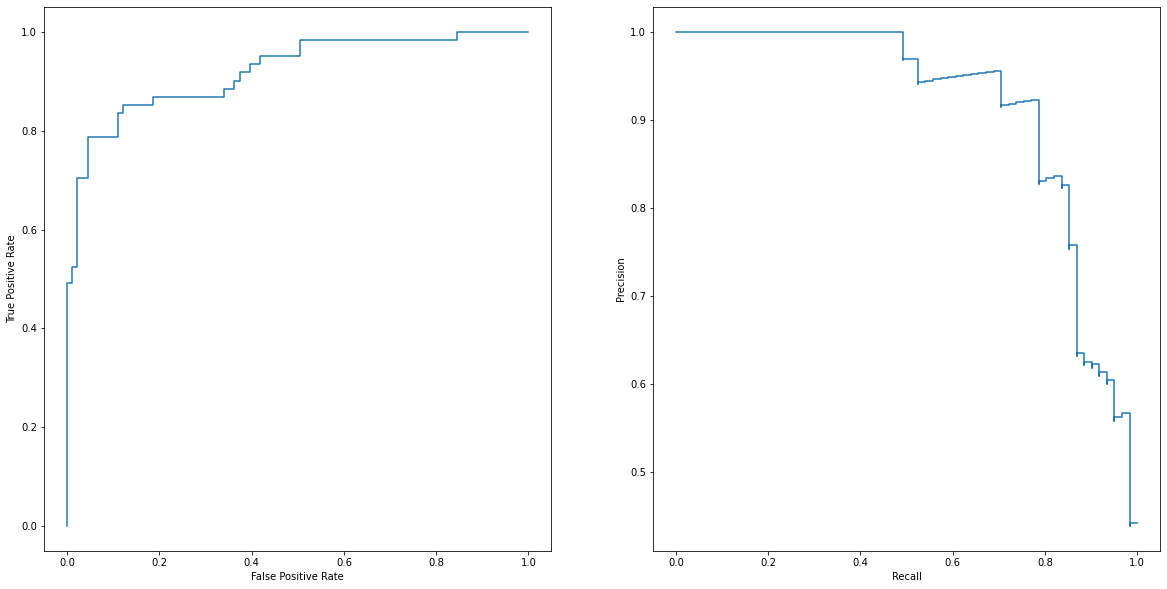

In [11]:
y_hat = model_xgb.predict(dtest)

# accuracy = accuracy_score(y_pred=(y_hat > 0.5), y_true=y_test)
# sensitivity, specificity, _ = sensitivity_specificity_support(y_true=y_test, y_pred=(y_hat > 0.5), average='binary')

# print("Accuracy: {}".format(accuracy))
# print("Sensitivity: {}".format(sensitivity))
# print("Specificity: {}".format(specificity))        
# print("AUROC: {}".format(roc_auc_score(y_test, y_hat)))
# print("AUPRC: {}".format(average_precision_score(y_test, y_hat)))

print(performances_hard_decision(y_test, y_hat))

plot_roc_prc(y_hat, y_test)

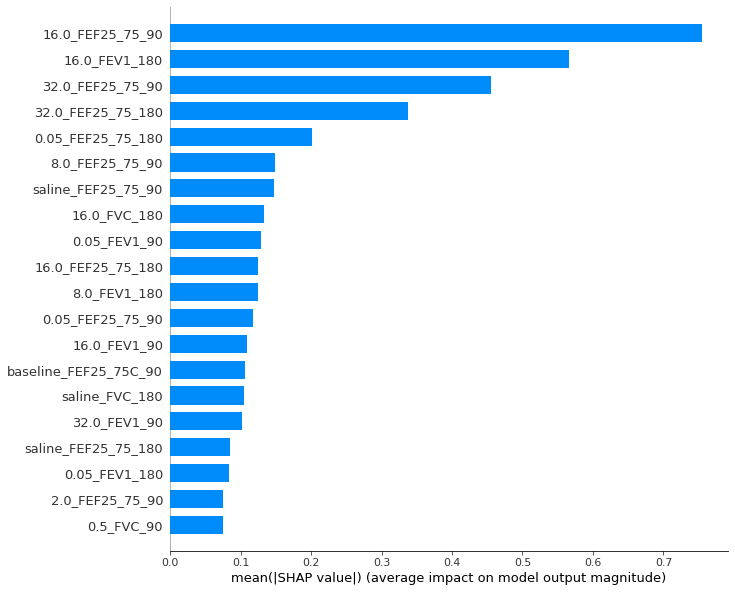

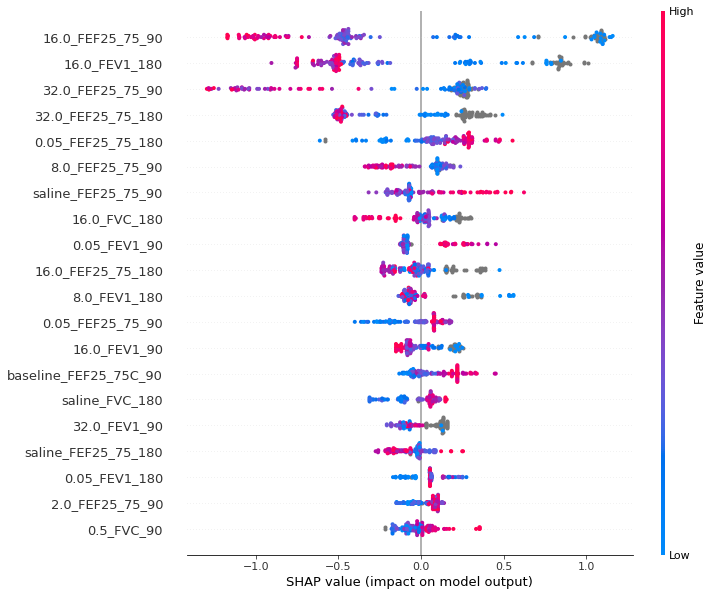

In [12]:
import shap

explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_mask, plot_size=(10, 10))

shap.summary_plot(shap_values, X_test, feature_names=feature_mask, plot_size=(10, 10))